Implement a denoising autoencoder that removes noise from images.

Train using dataset with artificially added noise.

Compare noisy and reconstructed images.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist


In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
input_img = layers.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 128s 267ms/step - loss: 0.3900 - val_loss: 0.3117
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 133s 249ms/step - loss: 0.3073 - val_loss: 0.3061
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 119s 253ms/step - loss: 0.3028 - val_loss: 0.3029
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 254ms/step - loss: 0.3002 - val_loss: 0.3010
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 116s 247ms/step - loss: 0.2985 - val_loss: 0.2994
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 116s 248ms/step - loss: 0.2969 - val_loss: 0.2988
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 116s 248ms/step - loss: 0.2954 - val_loss: 0.2973
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 246ms/step - loss: 0.2946 - val_loss: 0.2973
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 250ms/step - loss: 0.2939 - val_loss: 0.2966
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 254ms/step - loss: 0.2927 - val_loss: 0.2956
Epoch 11/50


KeyboardInterrupt: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


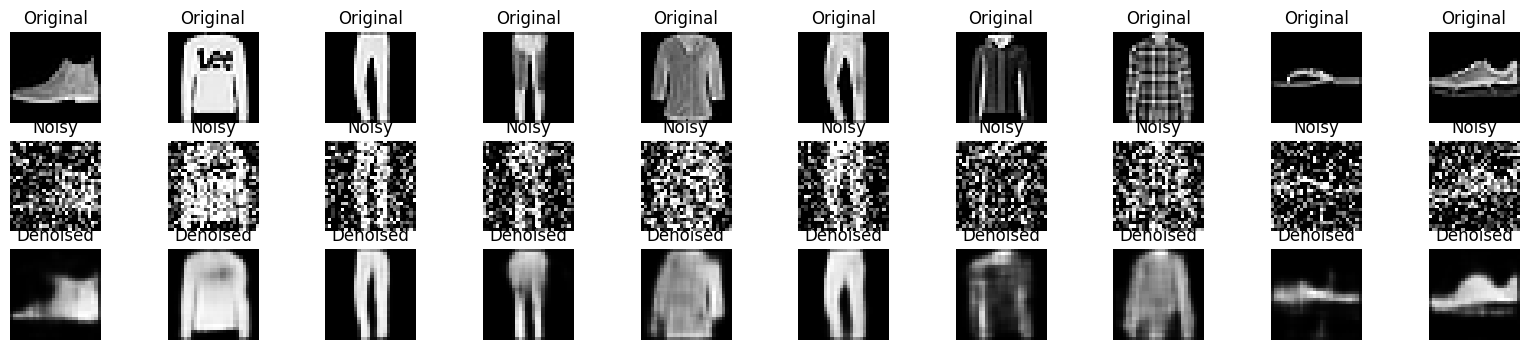

In [ ]:
denoised_images = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):

    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.show()

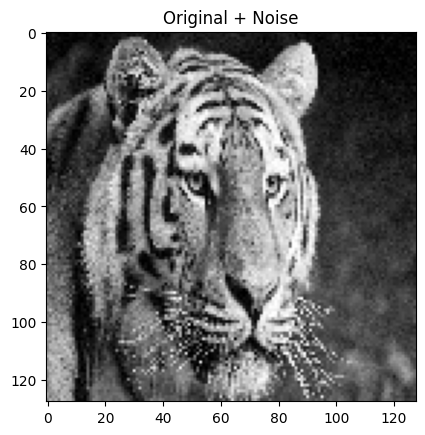

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.2584
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - loss: 0.2577
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2568
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2555
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.2536
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2506
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2475
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2422
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.2342
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2215
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2076
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2022
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1818
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1677
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1538
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━

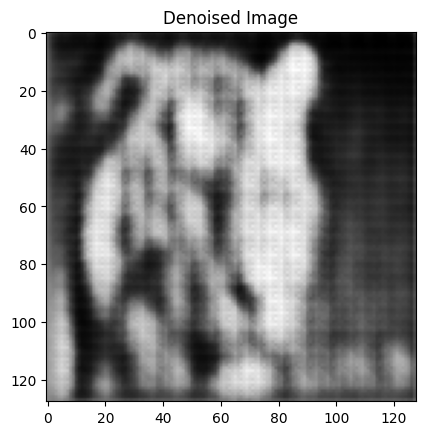

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, Model, losses
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the uploaded image
img_path = 'aga_img.jpg'
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if image is None:
    raise ValueError("Error: Image not found. Check the file path or upload again.")

# Resize to 128x128 and normalize
image = cv2.resize(image, (128, 128))
image = image.astype('float32') / 255.
image = np.expand_dims(image, axis=(0, -1))

# Add noise with an optimized noise factor
noise_factor = 0.03
image_noisy = image + noise_factor * tf.random.normal(shape=image.shape)
image_noisy = tf.clip_by_value(image_noisy, 0., 1.)

# Display noisy image
plt.imshow(tf.squeeze(image_noisy), cmap='gray')
plt.title("Original + Noise")
plt.show()

# Define an optimized Autoencoder
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(128, 128, 1)),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=2)
        ])
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(256, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(128, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Initialize autoencoder
autoencoder = Denoise()
autoencoder.compile(optimizer='adam', loss=losses.MeanAbsoluteError())

# Train the model with the noisy image
autoencoder.fit(image_noisy, image, epochs=50, shuffle=True, verbose=1)

# Denoise the image
denoised_image = autoencoder(image_noisy)

# Display denoised image
plt.imshow(tf.squeeze(denoised_image), cmap='gray')
plt.title("Denoised Image")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Implement a Variational Autoencoder (VAE) using TensorFlow/Keras.

Train on the dataset and generate new images.

Visualize the latent space.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.2999 - val_loss: 0.2180
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2147 - val_loss: 0.2057
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2045 - val_loss: 0.2004
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1995 - val_loss: 0.1966
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1958 - val_loss: 0.1938
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1930 - val_loss: 0.1918
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1910 - val_loss: 0.1903
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1894 - val_loss: 0.1891
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1881 - val_loss: 0.1882
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1870 - val_loss: 0.1874
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━

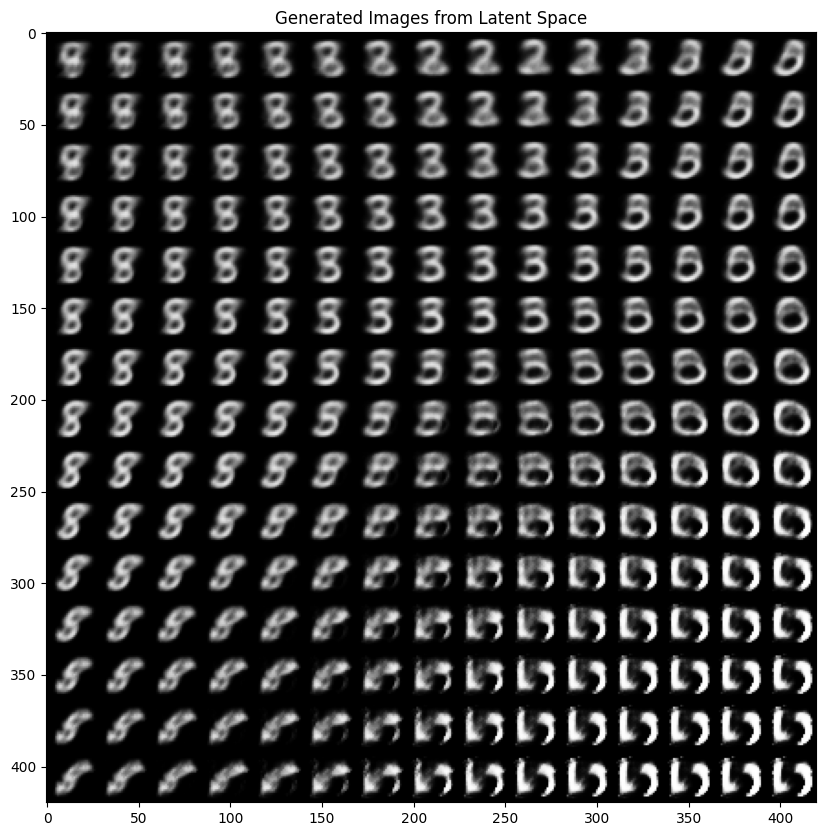

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Parameters
original_dim = 784  # 28x28 pixels for MNIST
latent_dim = 2  # 2D latent space for visualization
batch_size = 128
epochs = 10

# Build Encoder
def build_encoder(input_shape, latent_dim):
    inputs = keras.Input(shape=input_shape)
    x = layers.Dense(256, activation='relu')(inputs)
    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    # Sampling function
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling)([z_mean, z_log_var])

    encoder = keras.Model(inputs, [z_mean, z_log_var, z], name='encoder')
    return encoder

# Build Decoder
def build_decoder(latent_dim, original_dim):
    latent_inputs = keras.Input(shape=(latent_dim,))
    x = layers.Dense(256, activation='relu')(latent_inputs)
    outputs = layers.Dense(original_dim, activation='sigmoid')(x)

    decoder = keras.Model(latent_inputs, outputs, name='decoder')
    return decoder

# Define VAE
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        return reconstructed

# Load and preprocess MNIST dataset
def load_mnist_data():
    (x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    return x_train, x_test

# Compile and train the VAE
def train_vae(x_train, x_test):
    encoder = build_encoder((original_dim,), latent_dim)
    decoder = build_decoder(latent_dim, original_dim)
    vae = VAE(encoder, decoder)

    vae.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy')

    vae.fit(x_train, x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, x_test))
    return vae

# Generate images from the latent space
def generate_images(decoder, n=15, digit_size=28):
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)

    figure = np.zeros((digit_size * n, digit_size * n))

    for i, yi in enumerate(grid_x):
        for j, xi in enumerate(grid_y):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    plt.imshow(figure, cmap='Greys_r')
    plt.grid(False)
    plt.title("Generated Images from Latent Space")
    plt.show()

# Main function to run the VAE
def main():
    # Load data
    x_train, x_test = load_mnist_data()

    # Train the VAE model
    vae = train_vae(x_train, x_test)

    # Generate and display images from the latent space
    generate_images(vae.decoder)

if __name__ == "__main__":
    main()